In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mass import MassSpectrum
from mass import VanKrevelen
import brutto_generator

/Users/av/Yandex.Disk.localized/Work/prog/masslib/mass.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes as inset_axes_func


In [2]:
gdf = brutto_generator.get_gdf()
gdf

,mass,C,H,O,N,S
4,14.01565,1,2,0,0,0
18,26.01565,2,2,0,0,0
0,27.01090,1,1,0,1,0
36,28.03130,2,4,0,0,0
8,30.01056,1,2,1,0,0
...,...,...,...,...,...,...
362933,1802.38245,59,90,59,2,1
363293,1804.39810,59,92,59,2,1
363653,1806.41375,59,94,59,2,1
364013,1808.42940,59,96,59,2,1


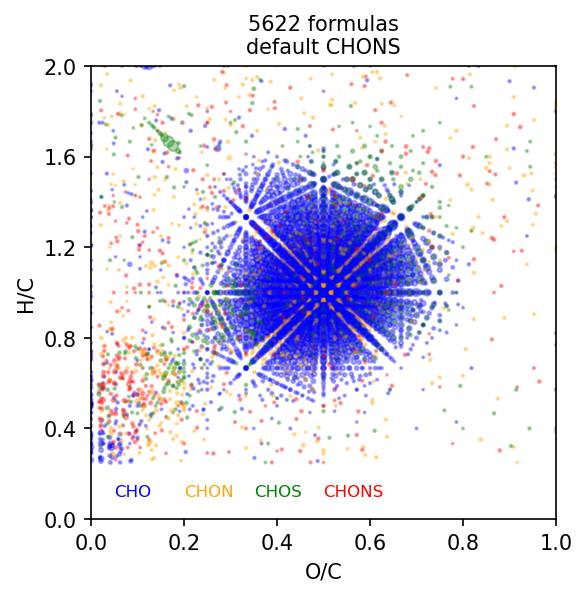

In [3]:
spec = MassSpectrum().load(filename="data/fa.csv",
                            mapper={'m/z':'mass', 'I':'I'},
                            take_columns=['mass','I'],
                            sep=',',
                            treshold=50
                            )
spec = spec.assign(generated_bruttos_table=gdf, elems='CHONS', rel_error=0.5)
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
vk = VanKrevelen(spec.table, name='default CHONS')
vk.draw_scatter(ax=ax)

In [4]:
gdf = brutto_generator.get_gdf( C=[1,40],
                                H=[0,80],
                                O=[0,50],
                                N=[0,2],
                                S=[0,1])

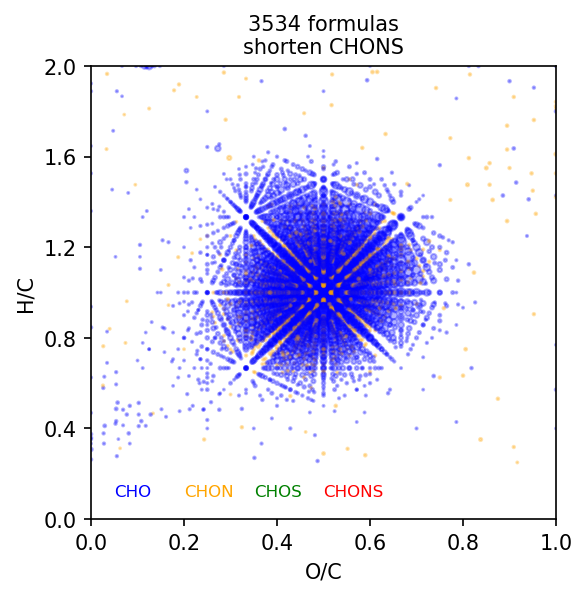

In [5]:
spec = MassSpectrum().load(filename="data/fa.csv",
                            mapper={'m/z':'mass', 'I':'I'},
                            take_columns=['mass','I'],
                            sep=',',
                            treshold=50
                            )
spec = spec.assign(generated_bruttos_table=gdf, elems='CHONS', rel_error=0.5)
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
vk = VanKrevelen(spec.table, name='shorten CHONS')
vk.draw_scatter(ax=ax)

In [6]:
gdf = brutto_generator.get_gdf()
brutto_generator.save_gdf(gdf)

In [7]:
gdf = brutto_generator.load_gdf()

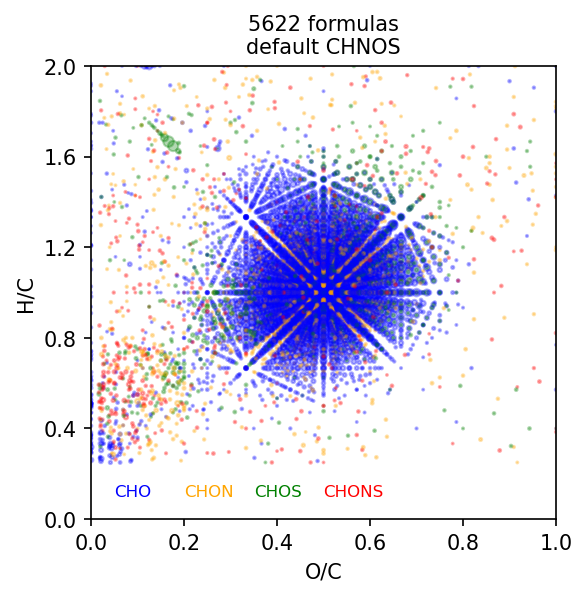

In [8]:
spec = MassSpectrum().load(filename="data/fa.csv",
                            mapper={'m/z':'mass', 'I':'I'},
                            take_columns=['mass','I'],
                            sep=',',
                            treshold=50
                            )
spec = spec.assign(generated_bruttos_table=gdf, elems='CHONS', rel_error=0.5)
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
vk = VanKrevelen(spec.table, name='default CHNOS')
vk.draw_scatter(ax=ax)